In [55]:
!pip install pandas matplotlib seaborn scikit-learn

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [57]:
df = pd.read_csv("/content/Credit_card_dataset - Credit_card_dataset.csv")

In [58]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [60]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [61]:
# Check how many missing values are in CREDIT_LIMIT

df['CREDIT_LIMIT'].isnull().sum()
print("missing_values" , df['CREDIT_LIMIT'].isnull().sum())

missing_values 1


In [62]:
# Fill missing value with the median of CREDIT_LIMIT



df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())


In [63]:
# Verify if the missing value is handled


df['CREDIT_LIMIT'].isnull().sum()

0

In [65]:
# Define numerical columns to check for outliers


numerical_cols = ["PURCHASES", "PAYMENTS", "CREDIT_LIMIT", "CASH_ADVANCE"]

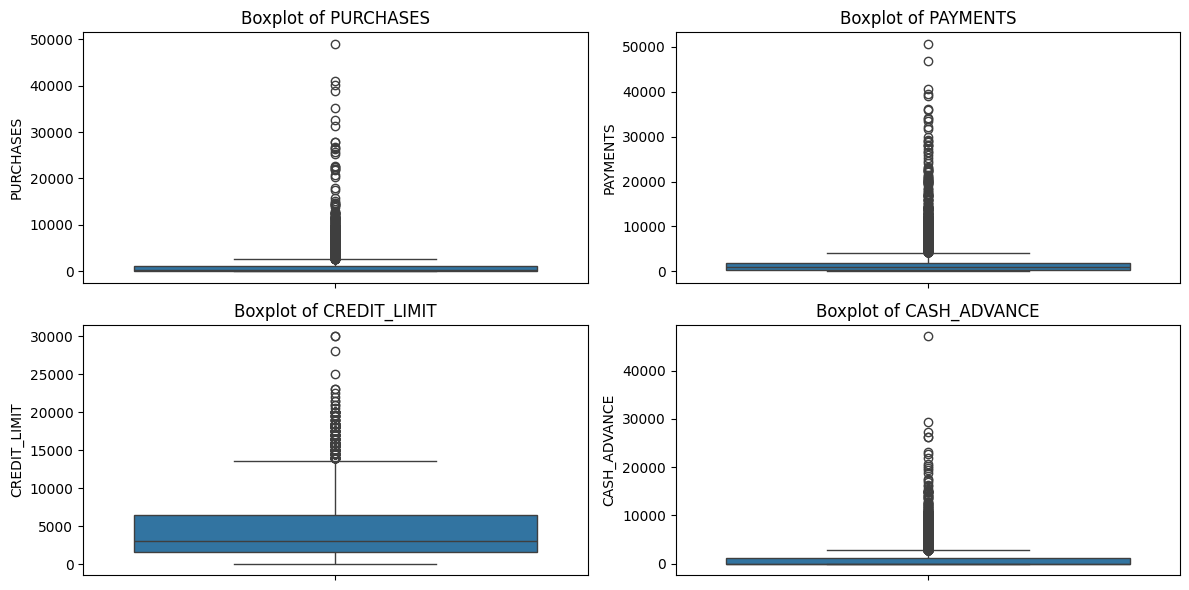

In [66]:
# Create boxplots to visualize outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [67]:
# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


In [68]:
# Apply outlier capping to numerical columns
for col in numerical_cols:
    cap_outliers(df, col)

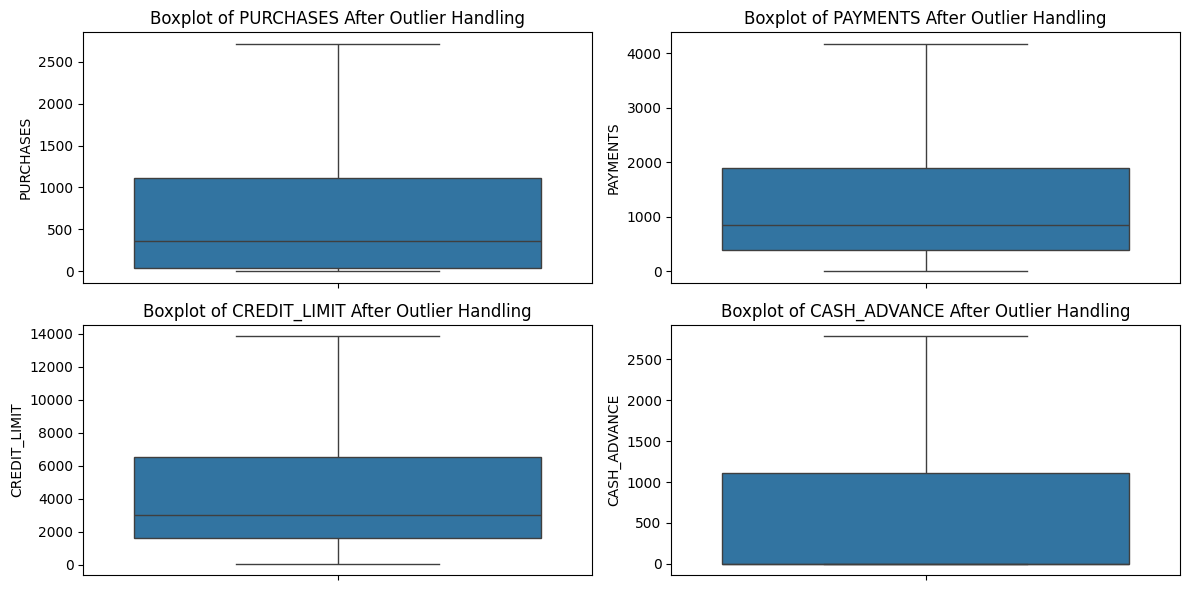

In [69]:
# Replot boxplots after handling outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} After Outlier Handling")

plt.tight_layout()
plt.show()

In [70]:
features = df[['PURCHASES', 'CREDIT_LIMIT']]


In [71]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [72]:
# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

In [73]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

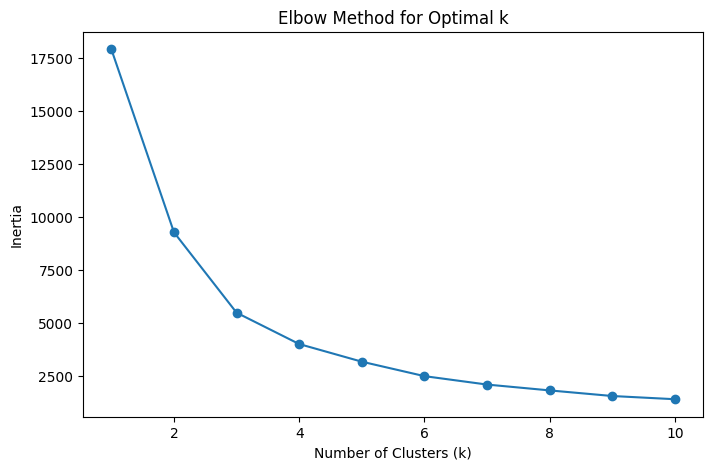

In [74]:
# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [75]:
# Apply K-means clustering with the optimal k (choose based on the elbow method)
optimal_k = 4  # Update this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

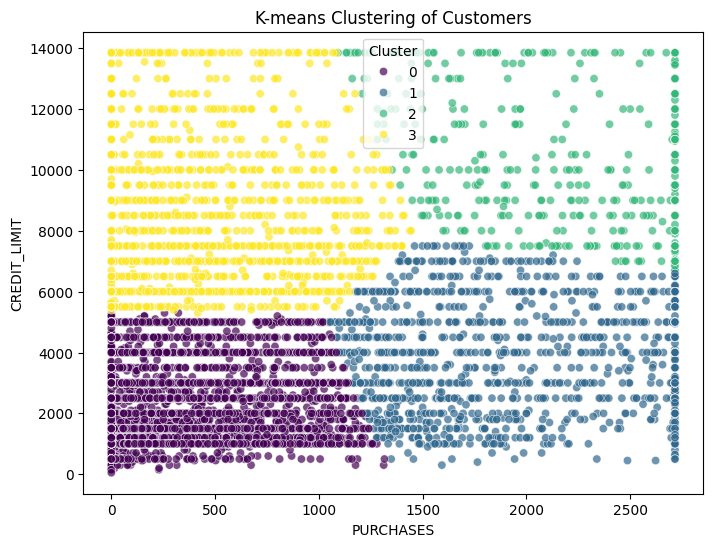

In [79]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette="viridis", alpha=0.7)
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.title("K-means Clustering of Customers")
plt.legend(title="Cluster")
plt.show()

#Interpretation of K-Means Clustering Results

Once you run the script and analyze the elbow plot, you'll determine the optimal number of clusters (let’s assume k = 4 for interpretation). The clusters represent different customer segments based on PURCHASES and CREDIT_LIMIT.

**Cluster Characteristics:**
1. Low Purchases, Low Credit Limit (Conservative Spenders)

- These customers have low spending and low credit limits.
- They might be new customers or individuals who use credit cards cautiously.
- Banks may try to increase their engagement by offering promotions.

2. High Purchases, Low Credit Limit (Potentially Risky Users)

- These customers spend a lot despite having a low credit limit.
- They might frequently max out their credit limit, indicating potential financial risk.
- Banks may monitor them for credit risk or offer targeted credit limit increases.

3. Low Purchases, High Credit Limit (Wealthy but Non-Frequent Users)

- These customers have high credit limits but do not make frequent purchases.
- They might be high-income individuals who use other payment methods.
- Banks could incentivize them with cashback rewards to encourage more spending.

4. High Purchases, High Credit Limit (Premium Customers)

- These customers spend a lot and have high credit limits.
- They are likely high-value customers for the bank.
- Banks may offer them exclusive benefits such as premium cards or loyalty programs.

Business Implications:

- Marketing Strategy: Different segments can be targeted with personalized offers (e.g., cashback for high spenders, credit limit increases for responsible spenders).
- Risk Management: Banks can identify risky customers who frequently max out their limits.
- Customer Retention: Providing incentives to low-spending, high-credit customers can improve engagement.